## tensorflow 創建tensor(張量)

## 元素皆為1

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


## 元素皆為0

In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


## 創建random matrix

*   normal --> normal distribution 設立標準差與平均的常態分佈
*   uniform --> range(min,max) 取隨機值


In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.36985013]
 [-1.8301082 ]
 [-0.2686944 ]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=5.)
print(x)

tf.Tensor(
[[3.75948  ]
 [2.15066  ]
 [0.9486443]], shape=(3, 1), dtype=float32)


## 給定matrix value in np

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

## 創建tensor 變數與修改

*   不能直接=,要用assign



In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(f'random tensor :\n {v}')
v.assign(tf.ones((3, 1)))
print(f'ones tensor :\n {v}')
v[0, 0].assign(3.) #不能寫=
print(f'modify tensor[0,0]:\n{v}')
v.assign_add(tf.ones((3, 1)))
print(f'add other tensor to v add(ones,v):\n{v}')

random tensor :
 <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.19987136],
       [-0.45359147],
       [ 0.04971137]], dtype=float32)>
ones tensor :
 <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>
modify tensor[0,0]:
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>
add other tensor to v add(ones,v):
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>


## tensor 運算

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b) #矩陣相乘
e *= d
print(f'a:{a}\n b:{b}\nc:{c}\nd:{d}\ne:{e}')

a:[[1. 1.]
 [1. 1.]]
 b:[[1. 1.]
 [1. 1.]]
c:[[1. 1.]
 [1. 1.]]
d:[[2. 2.]
 [2. 2.]]
e:[[4. 4.]
 [4. 4.]]


## 微分tensor

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var) # x^2微分後x=3帶入
print(f'input:\n{input_var}\n gradient:\n{gradient}')

input:
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
 gradient:
6.0


In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

## 微分兩次

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
speed,acceleration

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.8>)

## Generating two classes of random points in a 2D plane

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
negative_samples.shape,negative_samples,positive_samples

((1000, 2), array([[ 1.41504316,  2.82797571],
        [-0.83383535,  3.3342549 ],
        [-0.65422979,  2.8303488 ],
        ...,
        [-0.75832505,  1.92903144],
        [-1.60131155,  2.8011584 ],
        [-0.59296973,  2.12459086]]), array([[-0.42916788, -1.21069705],
        [ 2.51620276, -0.23475262],
        [ 1.96640528,  0.18224361],
        ...,
        [ 1.81387681,  0.04254023],
        [ 2.44383925, -0.86473662],
        [ 4.46269303,  1.73242623]]))

## merge two array

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(f'input size:{inputs.shape}\ninput data:{inputs}\n')
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets)

input size:(2000, 2)
input data:[[ 1.4150431   2.8279757 ]
 [-0.83383536  3.334255  ]
 [-0.6542298   2.8303487 ]
 ...
 [ 1.8138767   0.04254023]
 [ 2.4438393  -0.8647366 ]
 [ 4.462693    1.7324262 ]]

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


## inputs[:,0] --> col=0 的所有row 
## inputs[:,1] --> col=1 的所有row
## c=targets[:, 0] 兩個顏色 c=color

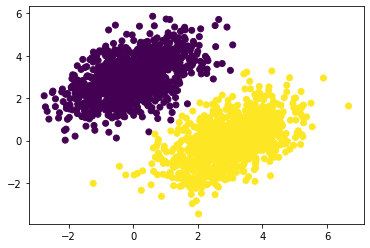

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
c = tf.Variable(initial_value=tf.zeros(shape=(output_dim)))
b.shape,W.shape

(TensorShape([1]), TensorShape([2, 1]))

## 創建linear model

*   只有一層Wx+b
*   loss=MSE



In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.5927
Loss at step 1: 0.3032
Loss at step 2: 0.1371
Loss at step 3: 0.1096
Loss at step 4: 0.0999
Loss at step 5: 0.0930
Loss at step 6: 0.0869
Loss at step 7: 0.0814
Loss at step 8: 0.0764
Loss at step 9: 0.0718
Loss at step 10: 0.0676
Loss at step 11: 0.0638
Loss at step 12: 0.0604
Loss at step 13: 0.0572
Loss at step 14: 0.0543
Loss at step 15: 0.0517
Loss at step 16: 0.0493
Loss at step 17: 0.0471
Loss at step 18: 0.0451
Loss at step 19: 0.0433
Loss at step 20: 0.0416
Loss at step 21: 0.0401
Loss at step 22: 0.0387
Loss at step 23: 0.0375
Loss at step 24: 0.0363
Loss at step 25: 0.0353
Loss at step 26: 0.0343
Loss at step 27: 0.0335
Loss at step 28: 0.0327
Loss at step 29: 0.0320
Loss at step 30: 0.0313
Loss at step 31: 0.0307
Loss at step 32: 0.0302
Loss at step 33: 0.0297
Loss at step 34: 0.0292
Loss at step 35: 0.0288
Loss at step 36: 0.0284
Loss at step 37: 0.0281
Loss at step 38: 0.0278
Loss at step 39: 0.0275


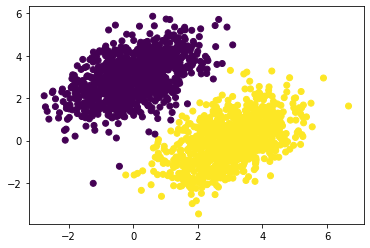

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

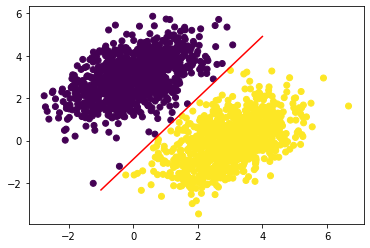

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## 自己創建神經網路

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


## 使用keras API

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

## layers --> models

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 2ms/step - loss: 18.8335 - binary_accuracy: 0.4950
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 18.1471 - binary_accuracy: 0.4960
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 17.5642 - binary_accuracy: 0.4955
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 17.0080 - binary_accuracy: 0.4955
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 16.4630 - binary_accuracy: 0.4945


In [ ]:
history.history

{'loss': [18.833518981933594,
  18.147109985351562,
  17.564159393310547,
  17.008014678955078,
  16.463041305541992],
 'binary_accuracy': [0.4950000047683716,
  0.4959999918937683,
  0.49549999833106995,
  0.49549999833106995,
  0.4945000112056732]}

## 監控驗證數據上的loss and metrics

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.7103 - binary_accuracy: 0.8400 - val_loss: 0.0306 - val_binary_accuracy: 1.0000
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0730 - binary_accuracy: 0.9593 - val_loss: 0.0327 - val_binary_accuracy: 0.9983
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0767 - binary_accuracy: 0.9536 - val_loss: 0.2023 - val_binary_accuracy: 0.7633
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0661 - binary_accuracy: 0.9621 - val_loss: 0.2478 - val_binary_accuracy: 0.6183
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0808 - binary_accuracy: 0.9521 - val_loss: 0.0260 - val_binary_accuracy: 1.0000


## Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[ 0.77202153]
 [-0.05205378]
 [-0.19340298]
 [ 0.9461324 ]
 [ 0.1947994 ]
 [ 0.05143845]
 [ 0.86637795]
 [ 0.08197799]
 [ 0.687902  ]
 [ 0.2130039 ]]


## Summary

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


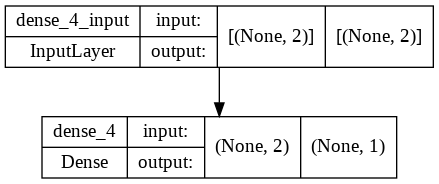

In [ ]:
from tensorflow.keras.utils import plot_model
model.summary()

plot_model(model, 
    show_shapes= True,
    expand_nested=True
)